In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [5]:
loc_df = pd.read_csv('../../data/raw/WFIGS_-_Wildland_Fire_Locations_Full_History (3).csv')

C:\Users\jeffr\AppData\Local\Temp\ipykernel_28180\484752815.py:1: DtypeWarning: Columns (14,16,20,21,23,32,46,55,61,77,78,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  loc_df = pd.read_csv('../data/raw/WFIGS_-_Wildland_Fire_Locations_Full_History (3).csv')


In [6]:
loc_df['FireDiscoveryDateTime'] = pd.to_datetime(loc_df['FireDiscoveryDateTime'])


In [7]:
loc_df = loc_df[loc_df['FireDiscoveryDateTime']>='2020-01-01']
loc_df = loc_df[loc_df['IncidentTypeCategory'] == 'WF']

In [8]:
loc_df.shape

(22799, 96)

In [9]:
loc_df.sort_values('FireDiscoveryDateTime')
loc_df.reset_index(drop = True, inplace = True)

In [10]:
loc_df.isnull().sum()

X                         0
Y                         0
OBJECTID                  0
ABCDMisc              19795
ADSPermissionState        0
                      ...  
Source                    0
GlobalID                  0
IsCpxChild            12715
CpxName               22745
CpxID                 22745
Length: 96, dtype: int64

In [11]:
loc_df['ContainmentDateTime'].isnull().sum()

325

In [12]:
loc_df['DailyAcres'].isnull().sum()

223

In [13]:
loc_df = loc_df[loc_df['DailyAcres'].isnull() == False]
loc_df = loc_df[loc_df['ContainmentDateTime'].isnull() == False]

In [14]:
loc_df.shape

(22251, 96)

In [15]:
df = loc_df[['X', 'Y', 'ContainmentDateTime', 'ControlDateTime', 'DailyAcres',
       'DiscoveryAcres', 'FireCause', 'FireDiscoveryDateTime',
       'IncidentTypeCategory', 'IncidentTypeKind', 'InitialLatitude',
       'InitialLongitude', 'IrwinID', 'LocalIncidentIdentifier', 'POOCounty',
       'POODispatchCenterID', 'POOFips', 'POOState', 'UniqueFireIdentifier']].copy()

<AxesSubplot: >

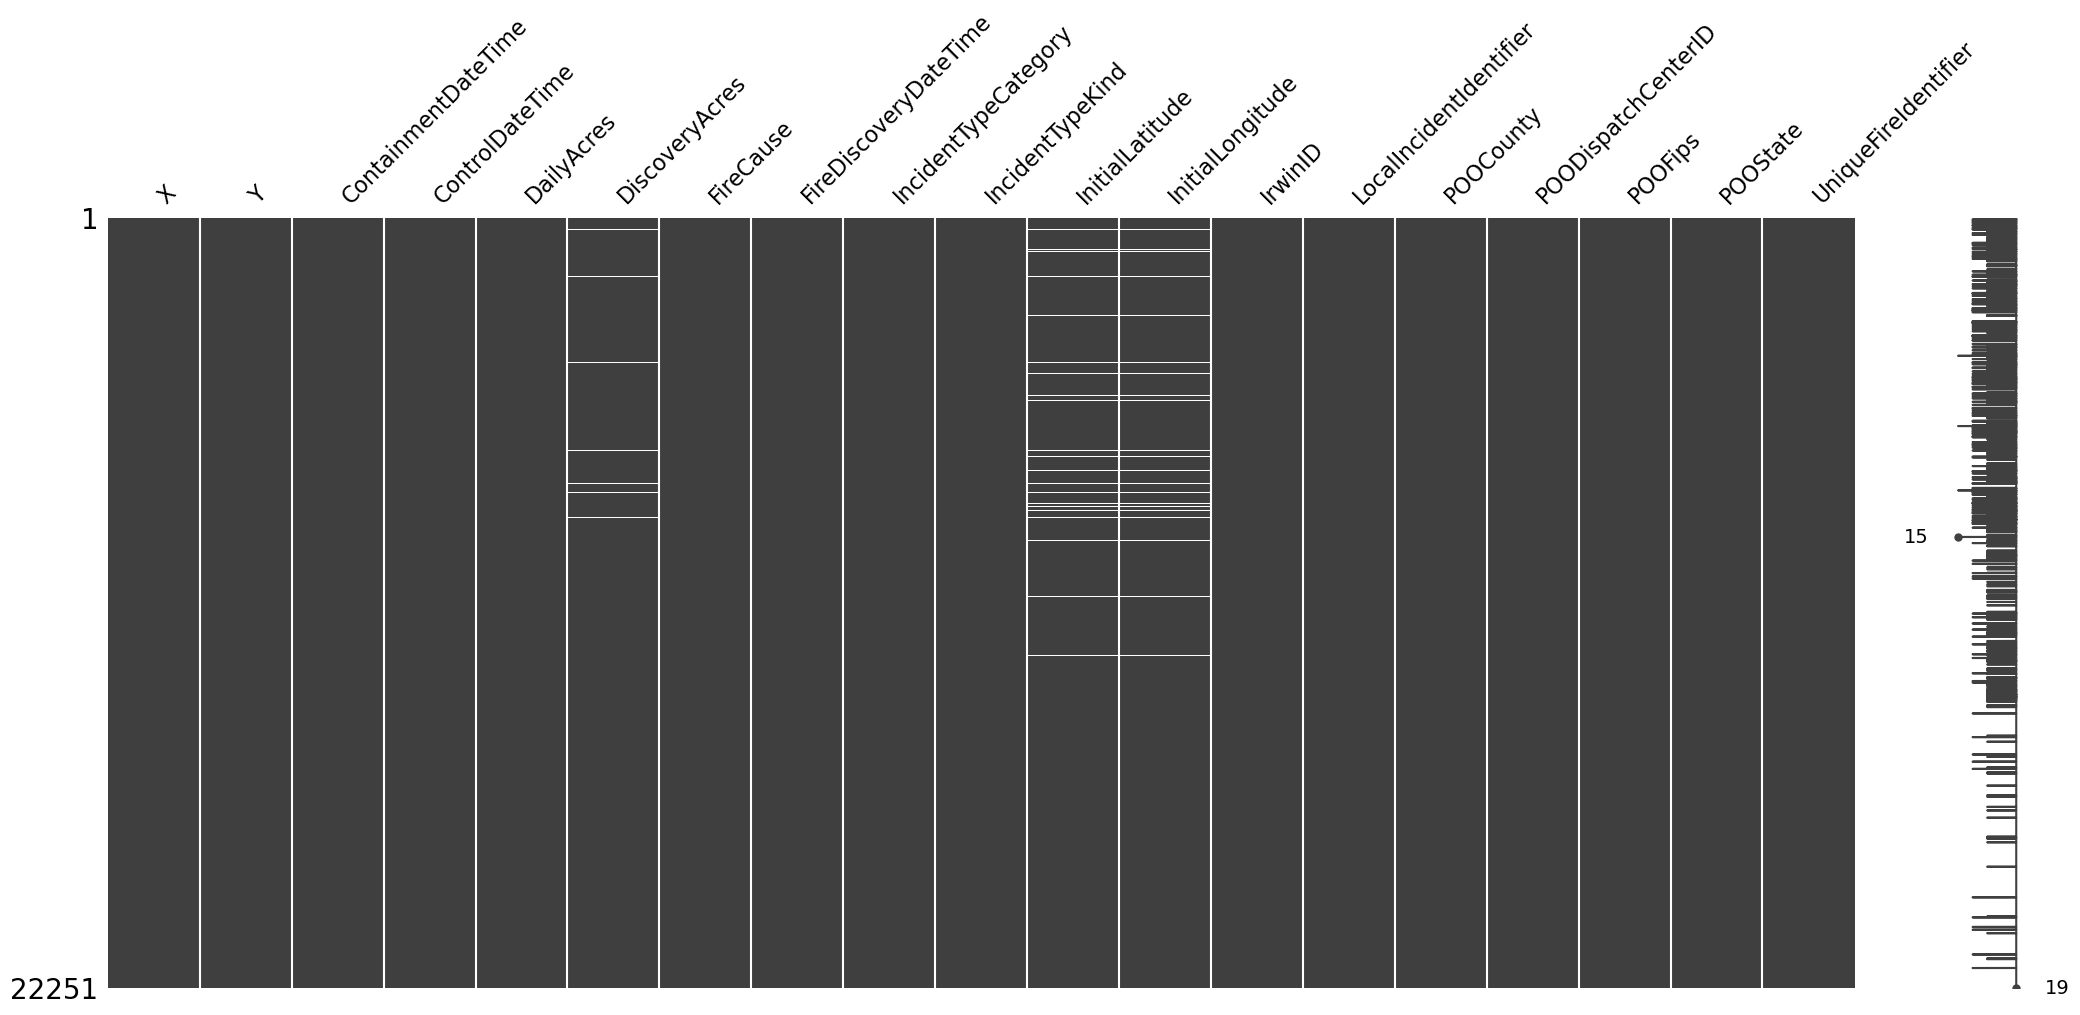

In [16]:
msno.matrix(df)

In [17]:
df.isnull().sum()

X                            0
Y                            0
ContainmentDateTime          0
ControlDateTime              0
DailyAcres                   0
DiscoveryAcres             196
FireCause                   12
FireDiscoveryDateTime        0
IncidentTypeCategory         0
IncidentTypeKind             0
InitialLatitude            709
InitialLongitude           709
IrwinID                      0
LocalIncidentIdentifier      0
POOCounty                    0
POODispatchCenterID          0
POOFips                      0
POOState                     0
UniqueFireIdentifier         0
dtype: int64

In [18]:
df.dropna(inplace = True)

In [19]:
df.shape

(21541, 19)

In [20]:
df.dtypes

X                                      float64
Y                                      float64
ContainmentDateTime                     object
ControlDateTime                         object
DailyAcres                             float64
DiscoveryAcres                         float64
FireCause                               object
FireDiscoveryDateTime      datetime64[ns, UTC]
IncidentTypeCategory                    object
IncidentTypeKind                        object
InitialLatitude                        float64
InitialLongitude                       float64
IrwinID                                 object
LocalIncidentIdentifier                 object
POOCounty                               object
POODispatchCenterID                     object
POOFips                                 object
POOState                                object
UniqueFireIdentifier                    object
dtype: object

In [21]:
df['ContainmentDateTime'] = pd.to_datetime(df['ContainmentDateTime'])
df['ControlDateTime'] = pd.to_datetime(df['ControlDateTime'])

In [23]:
#df.to_csv('./data/cleaned_dataset.csv', index = False)

In [24]:
df.head()

,X,Y,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,FireCause,FireDiscoveryDateTime,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,IrwinID,LocalIncidentIdentifier,POOCounty,POODispatchCenterID,POOFips,POOState,UniqueFireIdentifier
0,-111.348611,33.195755,2020-07-23 05:29:59+00:00,2020-07-23 05:29:59+00:00,8.0,2.5,Human,2020-07-22 21:51:00+00:00,WF,FI,33.195810,-111.348700,{951823FA-0B72-4295-87C8-E042D602324E},001450,Pinal,AZTDC,04021,US-AZ,2020-AZA3S-001450
1,-115.748812,40.617506,2020-08-03 23:00:00+00:00,2020-09-02 15:00:00+00:00,5985.9,5.0,Natural,2020-07-19 23:00:00+00:00,WF,FI,40.602563,-115.719777,{91E0CBAB-A24E-4590-B6C6-2B4A46907E8A},010145,Elko,NVEIC,32007,US-NV,2020-NVECFX-010145
3,-108.193611,39.858486,2020-08-30 00:00:00+00:00,2020-09-10 14:00:00+00:00,0.1,1.0,Natural,2020-08-29 21:46:00+00:00,WF,FI,39.891710,-108.266500,{3568D344-E3FB-415C-8014-ED34ECEAAB25},000323,Rio Blanco,COCRC,08103,US-CO,2020-COWRD-000323
4,-109.703111,40.227646,2020-10-28 20:15:00+00:00,2020-10-28 20:15:00+00:00,0.1,0.1,Human,2020-10-28 19:37:00+00:00,WF,FI,40.227700,-109.703169,{4BEBC503-DACD-4198-A1D8-323B614DA555},100463,Uintah,UTUBC,49047,US-UT,2020-UTNES-100463
5,-110.385511,31.961145,2020-07-10 18:14:59+00:00,2020-07-10 18:14:59+00:00,0.1,0.1,Human,2020-07-09 16:34:59+00:00,WF,FI,31.961200,-110.385600,{FB125AAC-0DE2-4547-A2D3-32891D98CB0F},001263,Cochise,AZTDC,04003,US-AZ,2020-AZA3S-001263


In [31]:
weather = pd.read_csv('https://raw.githubusercontent.com/General-Assembly-Group-Project/Wild-Fire-Analysis/dev/data/raw/meteo_weather.csv', index_col = 'Unnamed: 0')

In [33]:
weather.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,lat,long,id,index,station
0,2020-07-23,30.6,27.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.195810,-111.348700,0,NaN,NaN
0,2020-07-20,26.3,13.3,35.6,0.0,NaN,NaN,5.7,NaN,1012.4,NaN,40.602563,-115.719777,1,NaN,NaN
1,2020-07-21,25.3,15.0,33.9,0.0,NaN,359.0,9.0,NaN,1010.6,NaN,40.602563,-115.719777,1,NaN,NaN
2,2020-07-22,25.0,18.3,32.8,NaN,NaN,NaN,11.8,NaN,1008.6,NaN,40.602563,-115.719777,1,NaN,NaN
3,2020-07-23,22.0,12.2,32.8,NaN,NaN,NaN,11.7,NaN,NaN,NaN,40.602563,-115.719777,1,NaN,NaN


<AxesSubplot: >

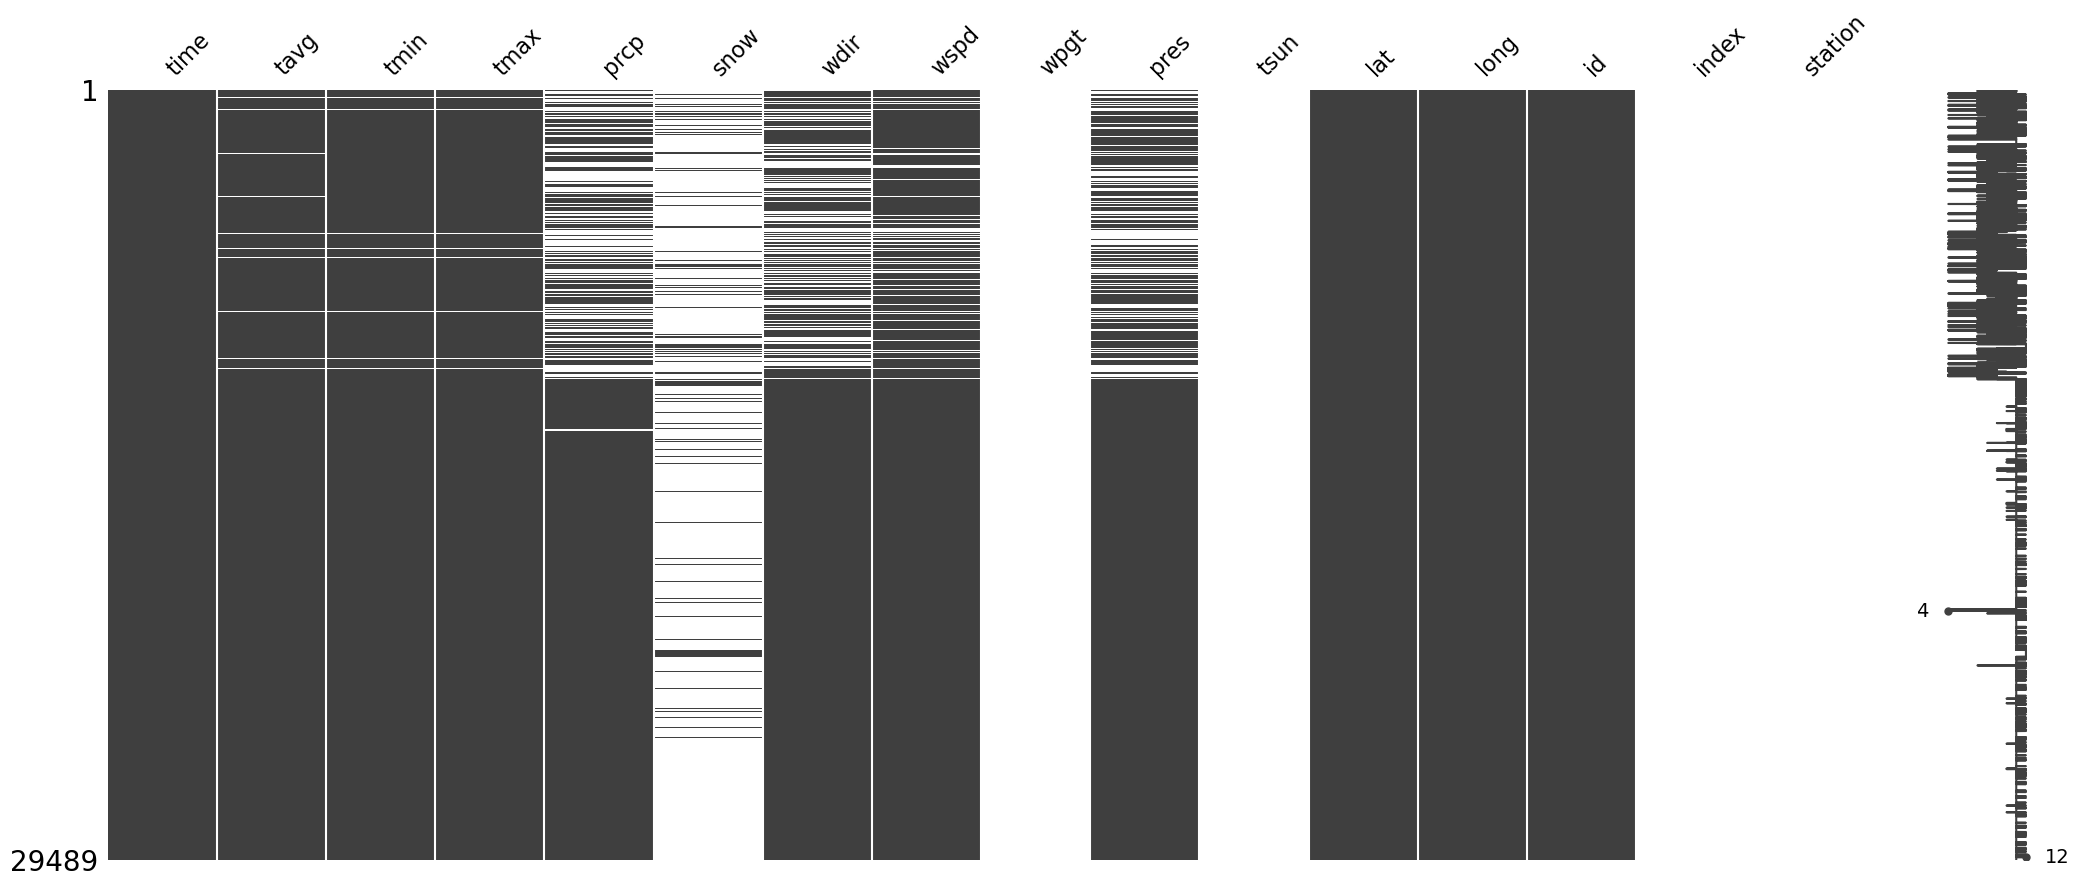

In [34]:
msno.matrix(weather)

In [35]:
weather.drop(columns = ['wpgt', 'tsun', 'index', 'station'], inplace = True)

<AxesSubplot: >

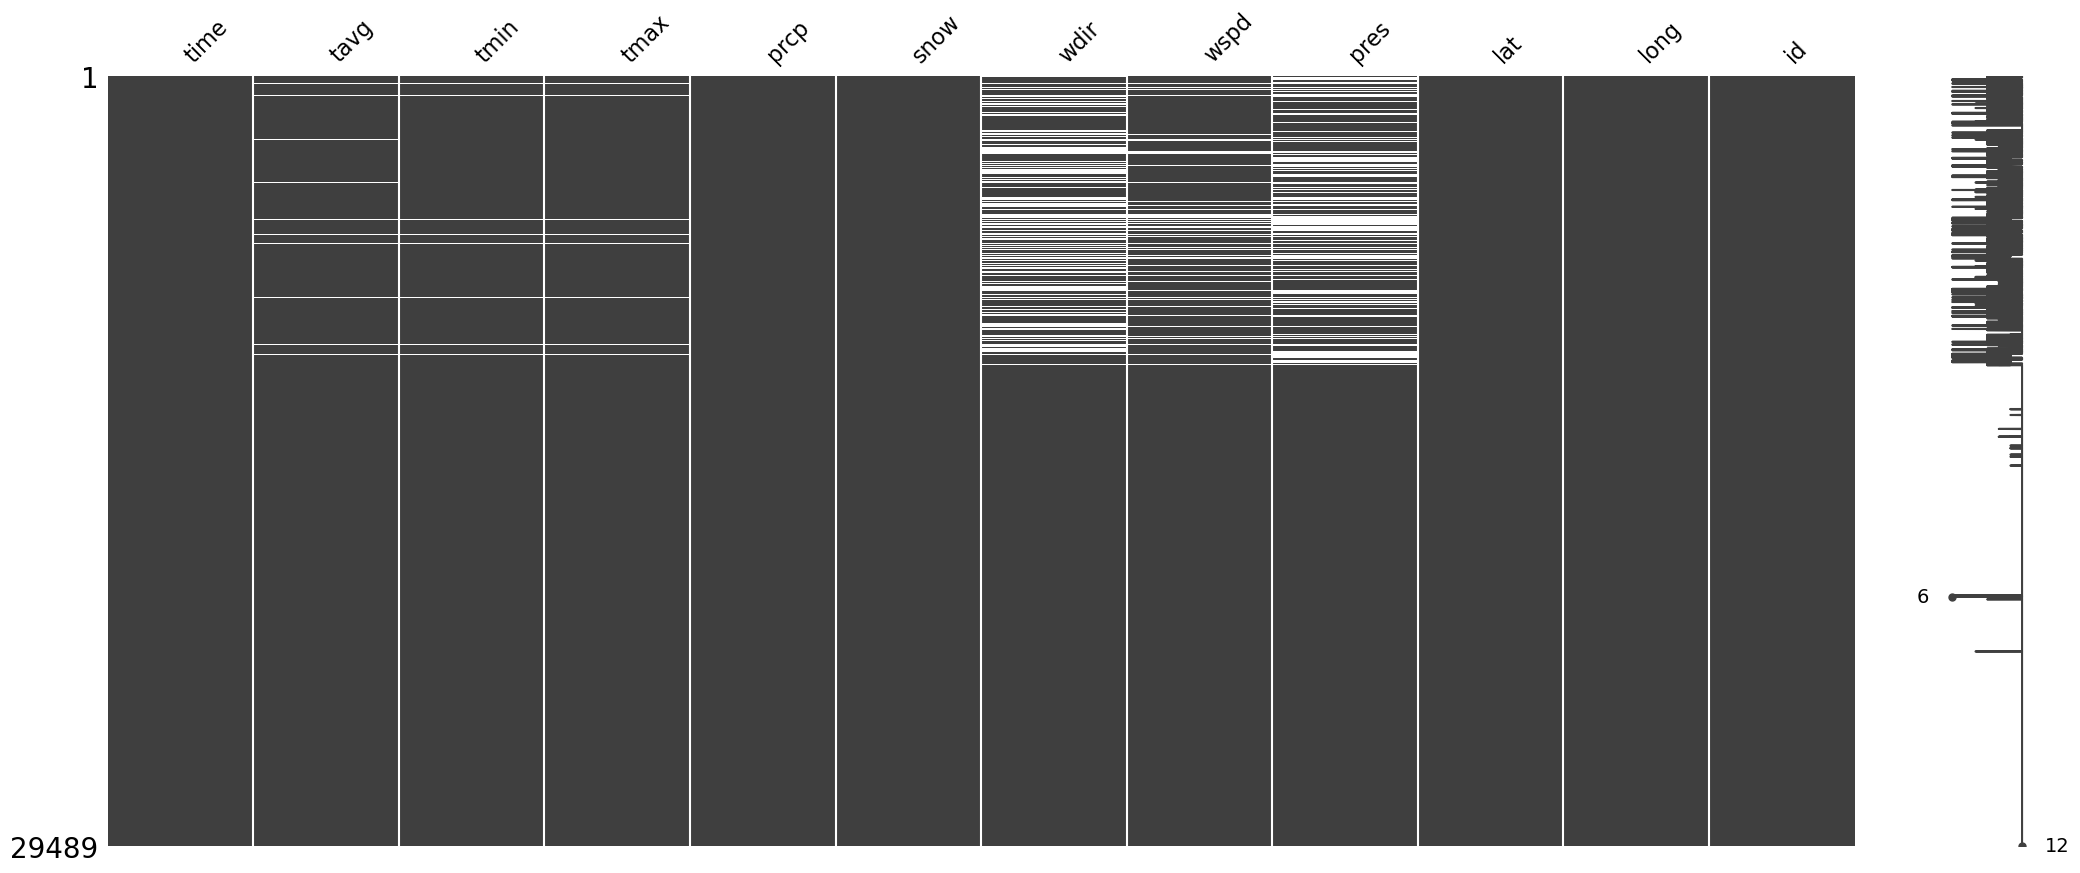

In [65]:
msno.matrix(weather)

In [39]:
weather['snow'].value_counts(dropna = False)

NaN     25949
0.0      3517
50.0        8
30.0        8
25.0        5
80.0        1
51.0        1
Name: snow, dtype: int64

In [40]:
weather['prcp'].value_counts(dropna = False)

0.0     17969
NaN      5565
0.3       423
0.1       359
0.5       292
        ...  
21.1        1
41.4        1
19.9        1
35.0        1
41.6        1
Name: prcp, Length: 309, dtype: int64

In [46]:
weather['snow'].fillna(0, inplace = True)
weather['prcp'].fillna(0, inplace = True)

In [47]:
weather['wdir'].value_counts(dropna = False)

NaN      4277
344.0     166
343.0     160
356.0     151
338.0     147
         ... 
111.0      26
63.0       26
128.0      25
153.0      24
360.0       2
Name: wdir, Length: 362, dtype: int64

In [60]:
weather['wspd'].value_counts(dropna = False)

NaN     1587
9.4      406
10.8     373
9.0      362
12.2     354
        ... 
35.7       1
38.7       1
35.9       1
34.7       1
39.2       1
Name: wspd, Length: 389, dtype: int64

In [58]:
weather['pres'].sort_values().unique()

array([ 993.1,  994.1,  994.2,  994.5,  994.6,  994.7,  995.3,  995.4,
        996.5,  996.6,  996.7,  996.9,  997.1,  997.2,  997.3,  997.5,
        997.6,  997.7,  998. ,  998.1,  998.2,  998.4,  998.5,  998.6,
        998.7,  998.8,  998.9,  999. ,  999.1,  999.2,  999.3,  999.4,
        999.5,  999.6,  999.7,  999.8,  999.9, 1000. , 1000.1, 1000.2,
       1000.3, 1000.4, 1000.5, 1000.6, 1000.7, 1000.9, 1001. , 1001.1,
       1001.2, 1001.3, 1001.4, 1001.5, 1001.6, 1001.7, 1001.8, 1001.9,
       1002. , 1002.1, 1002.2, 1002.3, 1002.4, 1002.5, 1002.6, 1002.7,
       1002.8, 1002.9, 1003. , 1003.1, 1003.2, 1003.3, 1003.4, 1003.5,
       1003.6, 1003.7, 1003.8, 1003.9, 1004. , 1004.1, 1004.2, 1004.3,
       1004.4, 1004.5, 1004.6, 1004.7, 1004.8, 1004.9, 1005. , 1005.1,
       1005.2, 1005.3, 1005.4, 1005.5, 1005.6, 1005.7, 1005.8, 1005.9,
       1006. , 1006.1, 1006.2, 1006.3, 1006.4, 1006.5, 1006.6, 1006.7,
       1006.8, 1006.9, 1007. , 1007.1, 1007.2, 1007.3, 1007.4, 1007.5,
      

In [66]:
# Imputing missing data using IterativeImputer


In [67]:
4277/29489

0.14503713249008104

In [79]:
len(weather['lat'].unique())

5668

In [76]:
counter = 0
for i in weather.index:
    if i == 0:
        counter += 1

counter

5747

In [80]:
5668/21541

0.2631261315630658

In [89]:
df.reset_index(drop = True, inplace = True)

In [90]:
states = []

for i in range(0, len(df['InitialLongitude'])):
    if df['InitialLongitude'][i] in weather['long'].unique():
        states.append(df['POOState'][i])

In [96]:
pd.Series(states).unique()

array(['US-AZ', 'US-NV', 'US-CO', 'US-CA', 'US-UT', 'US-ID', 'US-NM',
       'US-WY', 'US-OR'], dtype=object)